In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold , cross_val_score
from sklearn.ensemble import BaggingClassifier 

In [4]:
# import some data to play with
fraud_df = pd.read_csv('D:/Work/Data Science and Analyst Course/ExcelR/Data Science/Assignments/14_Decision Trees/Fraud_check.csv',index_col=0)

In [6]:
fraud_df

,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
Undergrad,,,,,
NO,Single,68833,50047,10,YES
YES,Divorced,33700,134075,18,YES
NO,Married,36925,160205,30,YES
YES,Single,50190,193264,15,YES
NO,Married,81002,27533,28,NO
...,...,...,...,...,...
YES,Divorced,76340,39492,7,YES
YES,Divorced,69967,55369,2,YES
NO,Divorced,47334,154058,0,YES


In [7]:
df_fraud=fraud_df.reset_index()

In [8]:
df_fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [9]:
df_fraud.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [10]:
df_fraud.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

### Treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [11]:
df_fraud["income"]="<=30000"

In [13]:
df_fraud.loc[df_fraud["Taxable.Income"]>=30000,"income"]="Good"
df_fraud.loc[df_fraud["Taxable.Income"]<=30000,"income"]="Risky"

In [14]:
df_fraud["income"].unique()

array(['Good', 'Risky'], dtype=object)

### Renaming Some Columns

In [17]:
df_fraud.rename(columns={'Marital.Status':'Marital_Status','City.Population':'City_Population','Work.Experience':'Work_Experience','Taxable.Income':'Taxable_Income'},inplace=True)

In [18]:
df_fraud

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban,income
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [20]:
colnames=list(df_fraud.columns)

In [21]:
colnames

['Undergrad',
 'Marital_Status',
 'Taxable_Income',
 'City_Population',
 'Work_Experience',
 'Urban',
 'income']

### Label Encoding for categorical data

In [23]:
le=LabelEncoder()
select_columns=["Undergrad","Marital_Status","Urban"]
le.fit(df_fraud[select_columns].values.flatten())
df_fraud[select_columns]=df_fraud[select_columns].apply(le.fit_transform)

In [24]:
df_fraud

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban,income
0,0,2,68833,50047,10,1,Good
1,1,0,33700,134075,18,1,Good
2,0,1,36925,160205,30,1,Good
3,1,2,50190,193264,15,1,Good
4,0,1,81002,27533,28,0,Good
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,Good
596,1,0,69967,55369,2,1,Good
597,0,0,47334,154058,0,1,Good
598,1,1,98592,180083,17,0,Good


In [25]:
df_fraud.shape

(600, 7)

In [26]:
df_fraud.income.value_counts()

Good     476
Risky    124
Name: income, dtype: int64

In [28]:
X=df_fraud.drop('income',axis=1)
Y=df_fraud['income']

In [29]:
X

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [30]:
Y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: income, Length: 600, dtype: object

In [32]:
# Splitting data into training and testing data set
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=10)


In [33]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
pd.crosstab(y_pred,y_test)

income,Good,Risky
row_0,,
Good,94,0
Risky,0,26


In [34]:
accuracy_score(y_pred , y_test)

1.0

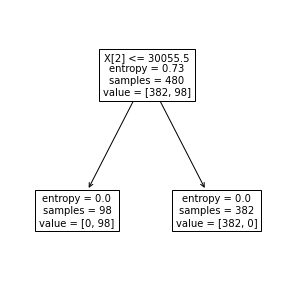

In [36]:
#PLot the decision tree
plt.figure(figsize=(5 , 5 ))

tree.plot_tree(model, fontsize=10);


### Building Decision Tree Classifier (CART) using Gini Criteria

In [37]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [38]:
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [39]:
#Prediction and computing the accuracy
y_gini_pred=model_gini.predict(x_test)


In [40]:
pd.crosstab(y_gini_pred,y_test)

income,Good,Risky
row_0,,
Good,94,0
Risky,0,26


In [41]:

accuracy_score(y_gini_pred ,y_test)

1.0

#### Bagging Classifier

In [44]:

kfold=KFold(n_splits=10)

In [48]:
cart=DecisionTreeClassifier(criterion='entropy')
bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=10,random_state=7)
bag_results= cross_val_score(bagging_model,X,Y,cv=kfold)

bag_results_1 = cross_val_score(bagging_model,x_train ,y_train,cv=kfold)

In [49]:
print(bag_results.mean())#full data

0.9983333333333334


In [50]:
print(bag_results_1.mean())#split data

0.9979166666666666
